,Education_Level,Years_of_Experience,Job_Title,Location,Industry,Salary
0,Master's,5.174094,ML Engineer,Austin,Finance,64255
1,PhD,4.401985,ML Engineer,San Francisco,Healthcare,81193
2,High School,5.183522,Web Developer,Austin,Tech,67487
3,Master's,1.024862,Data Scientist,New York,Tech,57344
4,Master's,4.560656,Software Engineer,New York,Education,103523


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education_Level      200 non-null    object 
 1   Years_of_Experience  200 non-null    float64
 2   Job_Title            200 non-null    object 
 3   Location             200 non-null    object 
 4   Industry             200 non-null    object 
 5   Salary               200 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
 RMSE:  24343.48
 RMSE:  26715.77
 RMSE:  28426.43
 RMSE:  26157.28


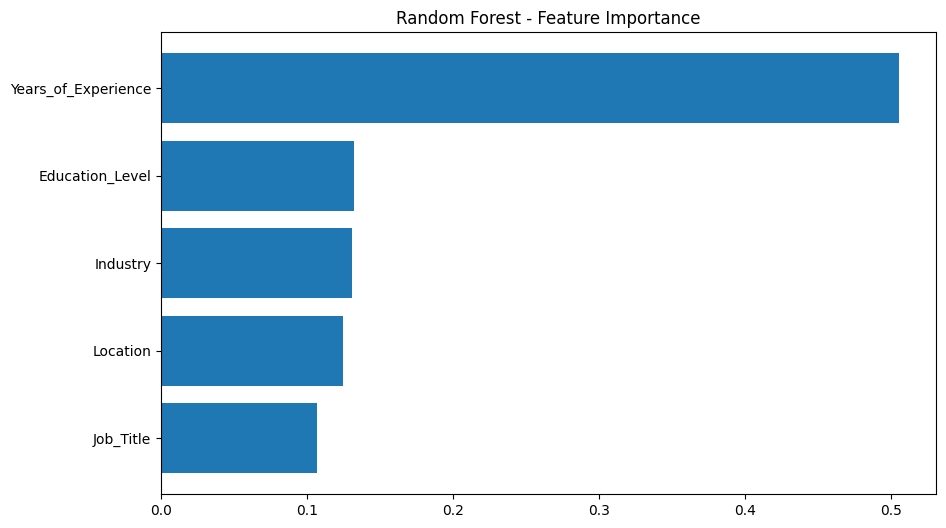

Predicted Salary: $71,010.46


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Salary Prediction using Ensemble Techniques

# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

# 📥 Load Dataset
df = pd.read_csv('C:/Users/hp/Downloads/salary_data (2).csv')  # Ensure this file exists

# 🔍 Initial Exploration
display(df.head())
df.info()
df.describe()

# 🧹 Data Preprocessing
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Education_Level', 'Job_Title', 'Location', 'Industry']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df[['Years_of_Experience']] = scaler.fit_transform(df[['Years_of_Experience']])

# 🔄 Train-test split
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Model Building
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Voting Regressor
voting = VotingRegressor([('rf', rf), ('gb', gb), ('xgb', xgb_model)])
voting.fit(X_train, y_train)

# 📊 Evaluation
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'XGBoost': xgb_model, 'Voting Ensemble': voting}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f" RMSE: {rmse: .2f}")

# 🔎 Feature Importance from Random Forest
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Random Forest - Feature Importance")
plt.show()

# 📈 Predict New Data
new_candidate = pd.DataFrame([{
    'Education_Level': label_encoders['Education_Level'].transform(["Master's"])[0],
    'Years_of_Experience': scaler.transform([[5]])[0][0],
    'Job_Title': label_encoders['Job_Title'].transform(['Data Scientist'])[0],
    'Location': label_encoders['Location'].transform(['New York'])[0],
    'Industry': label_encoders['Industry'].transform(['Tech'])[0]
}])

predicted_salary = voting.predict(new_candidate)
print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")
